In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext watermark
%watermark -u -n -t -z
%watermark -v -m -p numpy,pandas,matplotlib

last updated: Fri Mar 08 2019 21:44:50 CET
CPython 3.6.5
IPython 6.3.1

numpy 1.14.3
pandas 0.22.0
matplotlib 2.2.2

compiler   : GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.1)
system     : Darwin
release    : 18.5.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [3]:
with open('stores.json', 'r') as r:
    k = json.load(r)
df = pd.DataFrame(k['body']['items'])

In [4]:
df.head(3)

,adongCd,adongNm,bizesId,bizesNm,bldMngNo,bldMnno,bldNm,bldSlno,brchNm,ctprvnCd,...,lon,newZipcd,oldZipcd,plotSctCd,plotSctNm,rdnm,rdnmAdr,rdnmCd,signguCd,signguNm
0,2771031000,가창면,10027626,장모님치킨가창점,2771031024101200004036858,6,,,가창점,27,...,128.644459,42938,711861,1,대지,대구광역시 달성군 가창면 가창동로,대구광역시 달성군 가창면 가창동로 6,277103148001,27710,달성군
1,2729062500,상인2동,10048463,정통숯불바베큐치킨상인점,2729011500114280014013938,46,,,상인점,27,...,128.536144,42791,704370,1,대지,대구광역시 달서구 상원로,대구광역시 달서구 상원로 46,272903147008,27290,달서구
2,4125056500,불현동,10098244,짱구피자치킨,4125010300102680011008557,30,,,,41,...,127.065903,11320,483030,1,대지,경기도 동두천시 못골로,경기도 동두천시 못골로 30,412503189006,41250,동두천시


In [5]:
df.iloc[150]

adongCd                      4518051000
adongNm                             수성동
bizesId                        11707011
bizesNm                      BHC치킨정읍수성점
bldMngNo      4518010100109180004025584
bldMnno                              26
bldNm                             제일아파트
bldSlno                                
brchNm                            정읍수성점
ctprvnCd                             45
ctprvnNm                           전라북도
dongNo                                 
flrNo                                 1
hoNo                                   
indsLclsCd                            Q
indsLclsNm                           음식
indsMclsCd                          Q05
indsMclsNm                       닭/오리요리
indsSclsCd                       Q05A08
indsSclsNm                    후라이드/양념치킨
ksicCd                           I56193
ksicNm                           치킨 전문점
lat                             35.5833
ldongCd                      4518010100
ldongNm                             수성동


In [6]:
# Let's convert empty value to np.nan first
df.replace('', np.nan, inplace=True)

In [7]:
df.columns # what we need is bizesNm, ctprvnNm, signguNm, adongNm, rdnmAdr, lon and lat

Index(['adongCd', 'adongNm', 'bizesId', 'bizesNm', 'bldMngNo', 'bldMnno',
       'bldNm', 'bldSlno', 'brchNm', 'ctprvnCd', 'ctprvnNm', 'dongNo', 'flrNo',
       'hoNo', 'indsLclsCd', 'indsLclsNm', 'indsMclsCd', 'indsMclsNm',
       'indsSclsCd', 'indsSclsNm', 'ksicCd', 'ksicNm', 'lat', 'ldongCd',
       'ldongNm', 'lnoAdr', 'lnoCd', 'lnoMnno', 'lnoSlno', 'lon', 'newZipcd',
       'oldZipcd', 'plotSctCd', 'plotSctNm', 'rdnm', 'rdnmAdr', 'rdnmCd',
       'signguCd', 'signguNm'],
      dtype='object')

In [8]:
df.isnull().sum()[['bizesNm', 'ctprvnNm', 'signguNm', 'adongNm', 'rdnmAdr', 'lon', 'lat']]

bizesNm       0
ctprvnNm    193
signguNm    193
adongNm     193
rdnmAdr       0
lon           0
lat           0
dtype: int64

This is the `rdnmAdr` composition:

`ctprvnNm` + `signguNm` + `adongNm` + ...

So we have to extract missing values from `rdnmAdr`

[5 4 6]


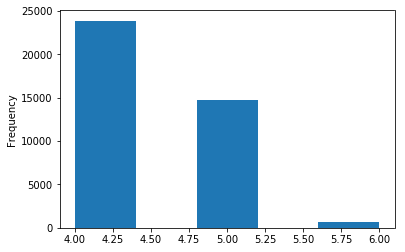

In [9]:
print(df['rdnmAdr'].apply(str.split).apply(len).unique())
df['rdnmAdr'].apply(str.split).apply(len).plot(kind='hist', bins=5)
plt.show()

In [10]:
print(df[df['rdnmAdr'].apply(str.split).apply(len) == 4].head(3)['rdnmAdr'])
print("len:", len(df[df['rdnmAdr'].apply(str.split).apply(len) == 4]['rdnmAdr']))
print("------")
print(df[df['rdnmAdr'].apply(str.split).apply(len) == 5].head(3)['rdnmAdr'])
print("len:", len(df[df['rdnmAdr'].apply(str.split).apply(len) == 5]['rdnmAdr']))
print("------")
print(df[df['rdnmAdr'].apply(str.split).apply(len) == 6].head(3)['rdnmAdr'])
print("len:", len(df[df['rdnmAdr'].apply(str.split).apply(len) == 6]['rdnmAdr']))
print("------")


1    대구광역시 달서구 상원로 46
2     경기도 동두천시 못골로 30
6      강원도 원주시 금불3길 5
Name: rdnmAdr, dtype: object
len: 23858
------
0      대구광역시 달성군 가창면 가창동로 6
3    경기도 김포시 고촌읍 장차로13번길 18
4      강원도 원주시 문막읍 원문로 1570
Name: rdnmAdr, dtype: object
len: 14670
------
223    경상남도 창원시 의창구 동읍 용정길46번길 49-1
318       충청북도 청주시 청원구 오창읍 연구단지로 21
332        충청남도 천안시 동남구 목천읍 충절로 890
Name: rdnmAdr, dtype: object
len: 649
------


In [11]:
df_Xna = df.dropna(subset=['signguNm', 'ctprvnNm', 'adongNm'])

In [12]:
print('ctprvnNm: ', df_Xna['ctprvnNm'].str.split().apply(len).unique())
print('signguNm: ', df_Xna['signguNm'].str.split().apply(len).unique())
print('adongNm: ', df_Xna['adongNm'].str.split().apply(len).unique())

ctprvnNm:  [1]
signguNm:  [1 2]
adongNm:  [1]


In [13]:
df.isnull().sum()['rdnmAdr']

0

In [14]:
df_Xna[df_Xna['rdnmAdr'].str.split().apply(lambda x: x[-3:]).apply(lambda x: not x[0].endswith(('면', '구', '시', '읍')))]

,adongCd,adongNm,bizesId,bizesNm,bldMngNo,bldMnno,bldNm,bldSlno,brchNm,ctprvnCd,...,lon,newZipcd,oldZipcd,plotSctCd,plotSctNm,rdnm,rdnmAdr,rdnmCd,signguCd,signguNm
22784,4671025000,담양읍,22563547,치킨런,4671025025101830004010477,191,백동주공아파트,NaN,NaN,46,...,126.987104,57346,517806,1,대지,전라남도 담양군 담양읍,전라남도 담양군 담양읍 191,467104658139,46710,담양군


From the result we got above, there should be only 2 variation in `rdnmAdr`. But there are 3. That signifies that the last variation, the one of length 6, originates both from `signguNm` and whatever part comes after the combination of `ctprvnNm`, `signguNm` and `adongNm`. As we can see above, the fact that we replaced all empty value(empty string) with `np.nan` does not affect the original dataframe

0     달성군
1     달서구
2    동두천시
Name: signguNm, dtype: object
-------
5     고양시 덕양구
8     청주시 청원구
9    고양시 일산동구
Name: signguNm, dtype: object


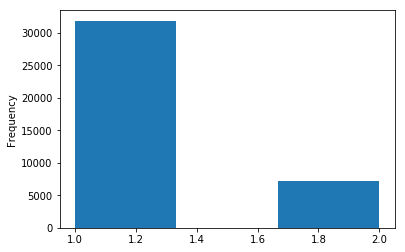

In [15]:
# Further investigation of difference in signguNm
print(df_Xna[df_Xna['signguNm'].str.split().apply(len) == 1]['signguNm'].head(3))
print('-------')
print(df_Xna[df_Xna['signguNm'].str.split().apply(len) == 2]['signguNm'].head(3))
df_Xna['signguNm'].str.split().apply(len).plot(kind='hist', bins=3)
plt.show()

In [16]:
df.isnull().sum()[['bizesNm', 'ctprvnNm', 'signguNm', 'adongNm', 'rdnmAdr', 'lon', 'lat']]
# We need to deal with np.nan values from ctprvnNm, signguNm and adongNm

bizesNm       0
ctprvnNm    193
signguNm    193
adongNm     193
rdnmAdr       0
lon           0
lat           0
dtype: int64

In [17]:
ctp = df[df['ctprvnNm'].isnull()].index
sig = df[df['signguNm'].isnull()].index
adn = df[df['adongNm'].isnull()].index
print(set(ctp) == set(sig))
print(set(sig) == set(adn))
print(set(ctp) == set(adn))
# Interestingly, all missing values exist in the same rows..
# Seems like somebody was tired of tying the address

True
True
True


In [18]:
def extract_from_rdnmAdr(row):
    if pd.isnull(row['ctprvnNm']):
        rdnm = row['rdnmAdr'].split()
        row['ctprvnNm'] = rdnm[0]
        if len(rdnm) == 4:
            row['signguNm'] = rdnm[1]
            row['adongNm'] = rdnm[2]
        else:
            row['signguNm'] = rdnm[1] + ' ' + rdnm[2]
            row['adongNm'] = rdnm[3]
    return row

In [19]:
df1 = df.apply(extract_from_rdnmAdr, axis=1)

In [20]:
df1.isnull().sum()[['ctprvnNm', 'signguNm', 'adongNm']] # seems like it's done. Let's double check

ctprvnNm    0
signguNm    0
adongNm     0
dtype: int64

In [21]:
check = df1[df1['ctprvnCd'].isnull()][['ctprvnNm', 'signguNm', 'adongNm', 'rdnmAdr']]

In [22]:
def check_it(row):
    s = '{} {} {}'.format(row['ctprvnNm'], row['signguNm'], row['adongNm'])
    return s in row['rdnmAdr']

In [23]:
check[check.apply(check_it, axis=1)==False] ## seems like all NAs from the required data is treated

,ctprvnNm,signguNm,adongNm,rdnmAdr


Now we have to think about the name of business in bizesNm section since we are going to group the stores and categorize each franchise brands using the name. There is brchNm which represents a branch name.

False    0.575312
True     0.424688
Name: brchNm, dtype: float64

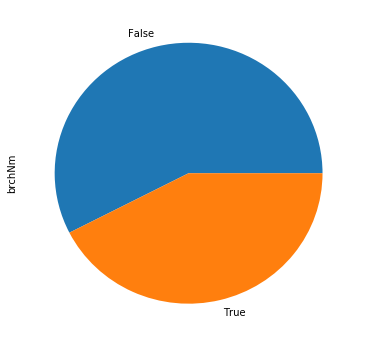

In [24]:
df1['brchNm'].notnull().value_counts().plot.pie(figsize=(6,6))
df1['brchNm'].notnull().value_counts(normalize=True)

So around 42% of data have branch name. But we have to check if the data without a branch name is a franch branch or not.

In [25]:
df1_Xbrnm = df1[df['brchNm'].isnull()]

In [26]:
df1_Xbrnm['bizesNm'].str.contains('처갓집|페리카나|BBQ', case=False, regex=True).value_counts(normalize=True)
# This shows that there are franchise without any branch name

False    0.935667
True     0.064333
Name: bizesNm, dtype: float64

In [27]:
df1_Xbrnm[df1_Xbrnm['bizesNm'].str.contains('점')][['bizesNm', 'adongNm']]

,bizesNm,adongNm
50,춘천진미닭갈비전문점,포남1동
96,꿀보닭강점,동백동
343,옛날통닭지귀점,봉림동
448,옛날통닭여상점,일도2동
478,산동요리점,복대2동
1491,준열정육점.치킨,관산읍
1544,후다닭치킨점,범계동
1603,굽네외동점,내외동
1617,티바치킨앤새우신갈직영점,신갈동
1737,뉴치킨백화점,상북면


In [28]:
# https://namu.wiki/w/%EC%B9%98%ED%82%A8/%EA%B0%80%EA%B2%8C%20%EB%AA%A9%EB%A1%9D
fran = ["BHC", "BBQ", "네네", "페리카나", 
 "맘스터치", "교촌", "굽네", "처갓집",
 "호식이", "멕시카나", "또래오래", "또봉이",
 "지코바", "썬더", "부어", "맥시칸", "피자나라",
 "훌랄라", "땅땅", "티바", "치킨마루", "노량통닭",
 "돈치킨", "디디", "매니아", "투존", "호치킨",
 "충만", "본스", "깻잎", "오븐에", "보드람", "강호동",
 "푸라닭", "장모님", "핫썬", "쌀통닭",
 "다사랑", "강정이", "종국이", "림스", "60계",
 "가마로", "계동", "간부", "코리엔탈", "누나홀닭", 
 "다사랑", "둘둘", "땅땅", "맛닭꼬", "멕시칸",
 "못말리는", "미쳐버린", "박군", "불로만", "스모프",
 "신통", "쌀통닭", "알통", "지코바", "치킨마루",
 "치킨쥼", "투존", "티바", "순수", "이춘봉", "거성",
 "구어스", "구어조은", "꼬끼나와", "꾸띵", "놀부",
 "닭굽는", "더썬", "플러스", "후라이팬", "닭익는",
 "동키", "구구", "두존", "둘리", "땡큐맘", "림스",
 "못난이", "바니", "바른", "범프리카", "본촌",
 "뿔레", "사또", "사쿠", "삼통", "새나라",
 "솜리", "송엘림", "신포", "아리아", "아주커",
 "암바", "양파닭", "영구", "오부장", "오마이",
 "오꾸", "이서방", "케이준", "찬미", "참참", "치르",
 "치코", "치키", "빡스", "뱅이", "신드롬", "아이",
 "시대", "더 킹", "카로스", "큰통", "키다리",
 "통통", "투마리", "파무쳐", "파스타", "피니치니",
 "러브레터", "해피오네", "잘하는", "햇살", "오늘", "TNT",
 "히어로", "맥켄", "KFC", "파파이스"]

fran = list(set(fran)) # preventing possible duplicates

In [29]:
df1[df1['bizesNm'].str.contains("|".join(fran))]

,adongCd,adongNm,bizesId,bizesNm,bldMngNo,bldMnno,bldNm,bldSlno,brchNm,ctprvnCd,...,lon,newZipcd,oldZipcd,plotSctCd,plotSctNm,rdnm,rdnmAdr,rdnmCd,signguCd,signguNm
0,2771031000,가창면,10027626,장모님치킨가창점,2771031024101200004036858,6,NaN,NaN,가창점,27,...,128.644459,42938,711861,1,대지,대구광역시 달성군 가창면 가창동로,대구광역시 달성군 가창면 가창동로 6,277103148001,27710,달성군
6,4213059000,단계동,10136167,치킨뱅이,4213011000108300006022278,5,NaN,NaN,NaN,42,...,127.932025,26423,220938,1,대지,강원도 원주시 금불3길,강원도 원주시 금불3길 5,421304457083,42130,원주시
10,4683025300,삼호읍,10208155,페리카나삼호대불점,4683025326104200000000001,78,NaN,NaN,삼호대불점,46,...,126.464158,58454,526897,1,대지,전라남도 영암군 삼호읍 대불주거로,전라남도 영암군 삼호읍 대불주거로 78,468303295043,46830,영암군
11,2818576200,연수2동,10208331,페리카나치킨연수우성체인점,2818510300106340000007257,180,연수우성2차아파트,NaN,연수우성체인점,28,...,126.683928,21931,406765,1,대지,인천광역시 연수구 원인재로,인천광역시 연수구 원인재로 180,281853152021,28185,연수구
12,4213059000,단계동,10208355,페리카나치킨벽산분점,4213011000108130012022273,34,NaN,NaN,벽산분점,42,...,127.931877,26423,220938,1,대지,강원도 원주시 금불3길,강원도 원주시 금불3길 34,421304457083,42130,원주시
17,4717065000,옥동,10274423,핫썬치킨옥동점,4717013300107870006027092,92,NaN,NaN,옥동점,47,...,128.701659,36661,760310,1,대지,경상북도 안동시 복주1길,경상북도 안동시 복주1길 92,471704721489,47170,안동시
18,4617054000,금남동,10310096,호식이두마리치킨나주점,4617010200106800024011448,83,만두박사,12.0,나주점,46,...,126.715677,58259,520130,1,대지,전라남도 나주시 나주로,전라남도 나주시 나주로 83-12,461703284011,46170,나주시
19,4211070500,신사우동,10398264,BHC치킨,4211011900100320003012141,62,NaN,NaN,강북점,42,...,127.730540,24221,200140,1,대지,강원도 춘천시 마장길,강원도 춘천시 마장길 62,421104454187,42110,춘천시
20,2917066900,일곡동,10407416,치킨아이,2917012700108160003015135,10,동아아파트,1.0,NaN,29,...,126.899571,61031,500795,1,대지,광주광역시 북구 우치로537번길,광주광역시 북구 우치로537번길 10-1,291704286581,29170,북구
23,4136037000,퇴계원면,10446498,페리카나치킨,4136037021103200000013511,4,NaN,NaN,NaN,41,...,127.141341,12126,472824,1,대지,경기도 남양주시 퇴계원면 경춘북로520번길,경기도 남양주시 퇴계원면 경춘북로520번길 4,413604391135,41360,남양주시


In [39]:
## Let's add new columns for the franchise name
df1['frnNm'] = np.nan

def extFrnNm(row):
    for n in fran:
        if n in row['bizesNm']:
            return n
    return "NONE"

a = df1.apply(extFrnNm, axis=1)

So, more than 50% of registered fried chicken restaurants are under one of franchise I listed. That's a lot

In [42]:
df1['frnNm'] = a

In [43]:
df1

,adongCd,adongNm,bizesId,bizesNm,bldMngNo,bldMnno,bldNm,bldSlno,brchNm,ctprvnCd,...,newZipcd,oldZipcd,plotSctCd,plotSctNm,rdnm,rdnmAdr,rdnmCd,signguCd,signguNm,frnNm
0,2771031000,가창면,10027626,장모님치킨가창점,2771031024101200004036858,6,NaN,NaN,가창점,27,...,42938,711861,1,대지,대구광역시 달성군 가창면 가창동로,대구광역시 달성군 가창면 가창동로 6,277103148001,27710,달성군,장모님
1,2729062500,상인2동,10048463,정통숯불바베큐치킨상인점,2729011500114280014013938,46,NaN,NaN,상인점,27,...,42791,704370,1,대지,대구광역시 달서구 상원로,대구광역시 달서구 상원로 46,272903147008,27290,달서구,NONE
2,4125056500,불현동,10098244,짱구피자치킨,4125010300102680011008557,30,NaN,NaN,NaN,41,...,11320,483030,1,대지,경기도 동두천시 못골로,경기도 동두천시 못골로 30,412503189006,41250,동두천시,NONE
3,4157025300,고촌읍,10099459,쭈노치킨,4157025324105380008019970,18,NaN,NaN,NaN,41,...,10126,415811,1,대지,경기도 김포시 고촌읍 장차로13번길,경기도 김포시 고촌읍 장차로13번길 18,415704427512,41570,김포시,NONE
4,4213025000,문막읍,10109021,챠밍치킨,4213025022112640000025752,1570,NaN,NaN,NaN,42,...,26368,220801,1,대지,강원도 원주시 문막읍 원문로,강원도 원주시 문막읍 원문로 1570,421303219041,42130,원주시,NONE
5,4128154000,성사1동,10135833,치킨더홈원당점,4128110600105190046006557,840,NaN,NaN,원당점,41,...,10466,412020,1,대지,경기도 고양시 덕양구 호국로,경기도 고양시 덕양구 호국로 840,412813000136,41281,고양시 덕양구,NONE
6,4213059000,단계동,10136167,치킨뱅이,4213011000108300006022278,5,NaN,NaN,NaN,42,...,26423,220938,1,대지,강원도 원주시 금불3길,강원도 원주시 금불3길 5,421304457083,42130,원주시,뱅이
7,4514061000,모현동,10136345,치킨월드,4514011400105290003092915,49,NaN,NaN,NaN,45,...,54655,570968,1,대지,전라북도 익산시 선화로13길,전라북도 익산시 선화로13길 49,451404607670,45140,익산시,NONE
8,4311454000,율량.사천동,10136346,치킨월드율량점,4311111500108060000045239,53,NaN,NaN,율량점,43,...,28328,363818,1,대지,충청북도 청주시 청원구 공항로138번길,충청북도 청주시 청원구 공항로138번길 53,431144508043,43114,청주시 청원구,NONE
9,4128554000,풍산동,10192000,통티닭강정,4128510700112940000009038,64,NaN,NaN,경기풍동점,41,...,10308,410330,1,대지,경기도 고양시 일산동구 숲속마을1로,경기도 고양시 일산동구 숲속마을1로 64,412853193017,41285,고양시 일산동구,NONE


In [44]:
df1[['bizesNm','frnNm' ,'ctprvnNm', 'signguNm', 'adongNm', 'rdnmAdr', 'lon', 'lat']].to_csv('stores_final.csv', index=False)
# We need only a few columns.